In [1]:
import numpy as np
import pandas as pd
import pingouin as pg
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show

import statsmodels.api as sm

import statsmodels.formula.api as smf

from pyprocessmacro import Process


In [2]:
causal_review_df = pd.read_hdf('causal_review_df_new_independent2.5.h5')
causal_review_df.critic_name.fillna(causal_review_df.media, inplace=True)
pd.options.display.max_colwidth = 100000
pd.set_option('display.max_rows', 100000000)

In [3]:
label1 = "a sheer personal preference based on desire or inclination"
label2 = "a sheer personal dispreference based on an absence of desire and inclination"
causal_review_df['interest'] =  causal_review_df[label1]

In [ ]:
causal_review_df[(causal_review_df['interest'] > 0)&(causal_review_df['interest'] < 0.01)&(causal_review_df['beauty'] > 0.99)].mean(numeric_only=True)

In [ ]:
causal_review_df[(causal_review_df['interest']>.9)&(causal_review_df['individual_meta_score']>99)&(causal_review_df['universal communicability']>0.99)].head(500)

In [ ]:
pg.partial_corr(data=causal_review_df, x='interest', y='beauty', covar=['sentiment','individual_meta_score','pleasure'])

In [ ]:
X1 = causal_review_df[['sentiment','individual_meta_score','pleasure']]
X2 = causal_review_df[['interest', 'universal communicability', 'individual_meta_score', 'the sublime']]
y = causal_review_df['beauty']

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.20)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.20)

ebm = ExplainableBoostingRegressor()
m1 = ebm.fit(X_train1, y_train1)

ebm2 = ExplainableBoostingRegressor()
m2 = ebm2.fit(X_train2, y_train2)

In [ ]:
r2 = r2_score(y_true=list(y_test), y_pred=list(ebm.predict(X_test1)))
print("r2: {:.3f}".format(r2))

In [ ]:
show(ebm2.explain_global())

In [ ]:
show(ebm2.explain_local(X_test2, y_test2))

In [4]:

p = Process(data=causal_review_df, model=2, x=label1, y='beauty', controls=['negativity in sentiment', 'displeasure'],w=['universal communicability'],m=['individual_meta_score'],
            modval={
                "universal communicability":[x/100 for x in list(range(0,101))],
                "transcendence":[x/100 for x in list(range(0,101))],
                "awe":[x/10 for x in list(range(0,11))],
                "the sublime":[x/10 for x in list(range(0,11))],
                "individual_meta_score":[x for x in list(range(0,101))],
                "beauty":[x for x in list(range(0,101))],
                "interest":[x for x in list(range(0,101))]
            }, suppr_init=True)

C:\Users\balvi\anaconda3\Lib\site-packages\pyprocessmacro\models.py:1567: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  grad = eval_expression(


In [5]:
p.summary()


***************************** OUTCOME MODELS ****************************

Outcome = beauty 
OLS Regression Summary

     R²  Adj. R²    MSE          F  df1     df2  p-value
 0.5824   0.5823 0.0746 46451.1546    7  233190   0.0000

Coefficients

                                                                                       coeff     se         t      p    LLCI    ULCI
Cons                                                                                  0.4845 0.0032  150.9203 0.0000  0.4782  0.4907
a sheer personal preference based on desire or inclination                            0.0783 0.0085    9.2454 0.0000  0.0617  0.0949
individual_meta_score                                                                 0.0032 0.0000   85.5340 0.0000  0.0032  0.0033
universal communicability                                                             0.2677 0.0022  119.1720 0.0000  0.2633  0.2721
a sheer personal preference based on desire or inclination*individual_meta_score     -0.

C:\Users\balvi\anaconda3\Lib\site-packages\pyprocessmacro\process.py:1339: SyntaxWarning: The moderator individual_meta_score exerts an influence on the effect, but is not specified as a factor on                     the graph. Its value has been explicitely set to 0.
  warnings.warn(
C:\Users\balvi\anaconda3\Lib\site-packages\pyprocessmacro\models.py:1567: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  grad = eval_expression(
C:\Users\balvi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


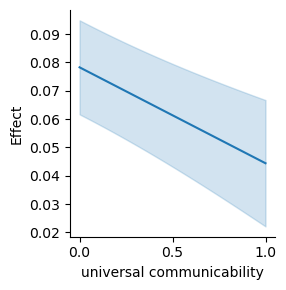

In [8]:
g = p.plot_conditional_direct_effects(x="universal communicability") 

In [9]:
floodlight_universal_direct = p.floodlight_direct_effect(mod_name="universal communicability", other_modval={"individual_meta_score": 100})

C:\Users\balvi\anaconda3\Lib\site-packages\pyprocessmacro\models.py:1567: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  grad = eval_expression(


In [10]:
floodlight_universal_direct

*********************** FLOODLIGHT ANALYSIS OF THE DIRECT EFFECT ***********************

----------------------------------- Analysis Details -----------------------------------

Focal Moderator:
    universal communicability, Range = [7.106e-05, 0.9998]

Spotlight value for other moderators:
    individual_meta_score = 100

----------------------------------- Analysis Results -----------------------------------

The direct effect is significantly positive on the interval [7.106e-05, 0.7715]


****************************************************************************************

In [88]:
causal_review_df[causal_review_df['interest']>0.95]

critic_name                         media  \
85                   David Edelstein                         Slate   
207                  Edward Guthmann       San Francisco Chronicle   
527                 Austin Chronicle              Austin Chronicle   
787                      Ruthe Stein       San Francisco Chronicle   
828                  Clayton Dillard                Slant Magazine   
1017                   Peter Travers                 Rolling Stone   
1064                    V.A. Musetto                 New York Post   
1192                    Justin Chang             Los Angeles Times   
1411                Michael Phillips               Chicago Tribune   
1583                  Tom Huddleston                           NaN   
1642                    Steve Greene                     IndieWire   
2188                 Robert Wilonsky                           NaN   
2443                    Robert Abele             Los Angeles Times   
2568                    Dana Stevens            The New York Times   
2627                   Wesley Morris                  Boston Globe   
2789                   Village Voice                 Village Voice   
2949                       Guy Lodge                       Variety   
3107                   Village Voice                 Village Voice   
3118              Stephanie Zacharek                         Salon   
3125                    Sarah Hepola              Austin Chronicle   
3332    The Globe and Mail (Toronto)  The Globe and Mail (Toronto)   
3520                  Tasha Robinson                 The A.V. Club   
3570                 David Edelstein   New York Magazine (Vulture)   
3691                   Megan Lehmann                 New York Post   
3946                     Roger Ebert             Chicago Sun-Times   
4085                    Peter Rainer     Christian Science Monitor   
4258                    Boston Globe                  Boston Globe   
4335                    Peter Rainer     Christian Science Monitor   
4546                  Lisa Alspector                Chicago Reader   
4716                Arizona Republic              Arizona Republic   
5206                    Joe Williams       St. Louis Post-Dispatch   
6373                      A.O. Scott            The New York Times   
6380              James Berardinelli                     ReelViews   
6436                   Todd McCarthy                       Variety   
6461              Stephanie Zacharek                         Salon   
6480                    Mick LaSalle       San Francisco Chronicle   
6794                   Wesley Morris                  Boston Globe   
6846                   The A.V. Club                 The A.V. Club   
6860                 Geoff Berkshire                       Variety   
7398                      J.R. Jones                Chicago Reader   
7421          The Hollywood Reporter        The Hollywood Reporter   
7608                  Peter Bradshaw                  The Guardian   
7675                    Keith Phipps                 The A.V. Club   
8065                    Justin Chang                       Variety   
8146                      Rick Groen  The Globe and Mail (Toronto)   
8276                   New York Post                 New York Post   
8278                Allison Benedikt               Chicago Tribune   
8910                        Time Out                      Time Out   
8912                         Variety                       Variety   
9468                   Peter Travers                 Rolling Stone   
9553              Michael Wilmington               Chicago Tribune   
9740                 Owen Gleiberman          Entertainment Weekly   
9978              The New York Times            The New York Times   
10345                     Steven Rea         Philadelphia Inquirer   
10356                     Rick Groen  The Globe and Mail (Toronto)   
10816        San Francisco Chronicle       San Francisco Chronicle   
10843                  Rory O'Conno